**Librerias para trabajar con la red neuronal y procesamiento de datos**

In [2]:
import os
import numpy as np # type: ignore
import scipy.io
from scipy.io import loadmat # type: ignore
import tensorflow as tf # Para red neuronal profunda
import numpy as np
import matplotlib.pyplot as plt
import time # Para tomar el tiempo de entrenamiento de la red
import math

In [3]:
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

**CONVERTIR MATRICES DE: .mat  --> .npy**

Directorios de entrada y salida: ***SUJETOS SANOS Y PACIENTES TEC***

**(1) sujetos sanos:** 1_HEMU - 2_DAOC - 3_DASI - 4_DABA - 5_HEFU - 6_JOBO - 7_ROMI - 8_FEGA - 9_GAGO - 10_MIMO - 11_JULE - 12_NIGA - 13_BYLA - 14_ARVA - 15_CLSE - 16_PAAR - 17_VATO - 18_FEBE - 19_VINA - 20_CLHE - 21_MAIN - 22_ALSA - 23_MIRA - 24_LACA - 25_GOAC - 26_ANGL - 27_HC036101
___________________________________________________________________________________________________________________________________________________________________________________

**(2) pacientes tec:** 1_DENI1005 - 2_KNOW1001 - 3_ALI0 - 4_BUTL - 5_HAGG - 6_HASTI007 - 7_BOAM - 8_DANE0005 - 9_GREG - 10_AITK - 11_RANS0000 - 12_JONES004 - 13_PERR - 14_SLAC - 15_HEPPL010 - 16_RICHS010 - 17_KENT0007 - 18_STAN1002 - 19_MCDON022 - 20_PULL - 21_MORR1002 - 22_PARK - 23_HIGH - 24_NOBL - 25_COWL - 26_KHAN - 27_NOLA

In [4]:



# Directorios de las matrices complejas (coeficientes) de las senales PAM ,VSCd y VSCi de suejtos sanos o pacientes con tec. Se debe modificar estos directorios para ir
# generando los respectivos modelos de cada individuo.

# DIRECTORIOS: SUJETO SANO

# SUJETO SANO O PACIENTE TEC POR ANALIZAR
persona = 'SANOS/1_HEMU'
# Sector de la VSC por analizar (derecho o izquierdo):
sector = 'derecho'
 # INPUT PARA LA RED
# INPUT PAM
input_pam_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/PAMnoises_matrixcomplex_mat'
# INPUT VSCd
input_vscd_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCdnoises_matrixcomplex_mat'
# INPUT VSCI
input_vsci_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCinoises_matrixcomplex_mat'

# OUTPUT O SALIDAS ESPERADAS PARA LA RED
# OUTPUT PAM
output_pam_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/PAMnoises_matrixcomplex_npy'
# OUTPUT PAM
output_vscd_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCdnoises_matrixcomplex_npy'
# OUTPUT PAM
output_vsci_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCinoises_matrixcomplex_npy'


#######################################################################################################################################################
#######################################################################################################################################################
#######################################################################################################################################################


# DIRECTORIOS: PACIENTE TEC
#paciente_tec = '/1_DENI1005'


 # INPUT PARA LA RED
# INPUT PAM
#input_pam_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/TEC' + persona + '/PAMnoises_matrixcomplex_mat'
# INPUT VSCd
#input_vscd_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/TEC' + persona + '/VSCdnoises_matrixcomplex_mat'
# INPUT VSCI
#input_vsci_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/TEC' + persona + '/VSCinoises_matrixcomplex_mat'

# OUTPUT O SALIDAS ESPERADAS PARA LA RED
# OUTPUT PAM
#output_pam_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/TEC' + persona + '/PAMnoises_matrixcomplex_npy'
# OUTPUT PAM
#output_vscd_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/TEC' + persona + '/VSCdnoises_matrixcomplex_npy'
# OUTPUT PAM
#output_vsci_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/TEC' + persona + '/VSCinoises_matrixcomplex_npy'


print(input_pam_dir)
print(input_vscd_dir)
print(input_vsci_dir)

D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/SANOS/1_HEMU/PAMnoises_matrixcomplex_mat
D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/SANOS/1_HEMU/VSCdnoises_matrixcomplex_mat
D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/SANOS/1_HEMU/VSCinoises_matrixcomplex_mat


Crear los directorios de salida si no existen

In [5]:
os.makedirs(output_pam_dir, exist_ok=True) # DIRECTORIO PARA GUARDAR MATRICES COMPLEJAS DE PAM EN FORMATO .npy
os.makedirs(output_vscd_dir, exist_ok=True) # DIRECTORIO PARA GUARDAR MATRICES COMPLEJAS DE VSCd EN FORMATO .npy
os.makedirs(output_vsci_dir, exist_ok=True) # DIRECTORIO PARA GUARDAR MATRICES COMPLEJAS DE VSCi EN FORMATO .npy

Funcion para convertir archivos .mat a .npy

In [6]:
total_files=sum(1 for filename in os.listdir(input_pam_dir) if filename.endswith('.mat')) + 1
print("Total de archivos a analizar -> ",total_files-1)

Total de archivos a analizar ->  50


In [7]:
def convert_mat_to_npy(input_dir, output_dir, prefix):
    for i in range(1, total_files):
        mat_file = os.path.join(input_dir, f'{prefix}_noise_{i}.mat')
        npy_file = os.path.join(output_dir, f'{prefix}_noise_{i}.npy')
        
        # Cargar el archivo .mat
        mat_data = loadmat(mat_file)
        
        # Extraer la matriz compleja
        matrix_key = [key for key in mat_data.keys() if not key.startswith('__')][0]
        matrix = mat_data[matrix_key]
        
        # Guardar la matriz en formato .npy
        np.save(npy_file, matrix)

Convertir archivos .mat a .npy para PAM y VSC

In [8]:
convert_mat_to_npy(input_pam_dir, output_pam_dir, 'matrix_complex_pam')
convert_mat_to_npy(input_vscd_dir, output_vscd_dir, 'matrix_complex_vscd')
convert_mat_to_npy(input_vsci_dir, output_vsci_dir, 'matrix_complex_vsci')

**Conversion a tensor tridimensional** (Estructura adecuada para entrenar la red U-net)

Directorios salida para matrices con estructura tensor tridimensional

In [9]:
input_pam_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/PAMnoises_matrixcomplex_npy'
input_vscd_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCdnoises_matrixcomplex_npy'
input_vsci_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCinoises_matrixcomplex_npy'

output_pam_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/PAMnoises_matrixcomplex_npy_tensor3d'
output_vscd_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCdnoises_matrixcomplex_npy_tensor3d'
output_vsci_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCinoises_matrixcomplex_npy_tensor3d'

Crear directorios de salida si no existen (matrices complejas en forma de tensor tridimensional)

In [10]:
os.makedirs(output_pam_dir, exist_ok=True)
os.makedirs(output_vscd_dir, exist_ok=True)
os.makedirs(output_vsci_dir, exist_ok=True)

####################################################
PREPROCESAMIENTO ANTES DE NORMALIZACIÓN DE MATRICES
####################################################

**CÁLCULO DE LA MEDIA - PAM & VSC (la media se calcula teniendo en cuenta todas las matrices)**

# Acumuladores para calcular la media de cada matriz (real e imaginaria) y la desviacion estandar

#==========================
#=== PAM SIGNAl ===========
#==========================
#===
# Para media
#===
sumatoria_real_pam = 0
media_real_pam = 0

sumatoria_imag_pam = 0
media_imag_pam = 0
#===
# Para la desviacion estandar
#===
sumatoria_real_cuadrada_pam = 0
sumatoria_imag_cuadrada_pam = 0

desv_real_pam = 0
desv_imag_pam = 0


#==========================
#=== VSC SIGNAl ===========
#==========================
#===
# Para media
#===
sumatoria_real_vsc = 0
media_real_vsc = 0

sumatoria_imag_vsc = 0
media_imag_vsc = 0
#===
# Para la desviacion estandar
#===
sumatoria_real_cuadrada_vsc = 0
sumatoria_imag_cuadrada_vsc = 0

desv_real_vsc = 0
desv_imag_vsc = 0




**FUNCIONES PARA EL CÁLCULO DE LA MEDIA Y DESVIACIÓN ESTÁNDAR PARA LAS SEÑALES [[  PAM  ]]**

#Entrada: matriz(array bidimensiional nxm), sumatoria_real_pam(int)
#Salida: -
#Descripcion: funcion que suma todos los elementos de una matriz (parte real de una matriz compleja PAM)
def sumatoria_acumulada_real_pam(matriz):
    global sumatoria_real_pam
    sumatoria_real_pam = sumatoria_real_pam + np.sum(matriz)
    #print(sumatoria_real_pam)

#Entrada: matriz(array bidimensiional nxm), sumatoria_real_cuadrada_pam(int)
#Salida: -
#Descripcion: funcion que tiene como objetivo calcular el (x - u)^2 para su posterior uso en el calculo de la desviacion estandar. 
#             Con "x" cada elementos de la matriz y "u" la media de todas las matrices PAM.
def sumatoria_acumulada_real_cuadrada_pam(matriz):
    global sumatoria_real_cuadrada_pam, media_real_pam
    for fila in matriz:
        for elemento in fila:
            sumatoria_real_cuadrada_pam = sumatoria_real_cuadrada_pam + (elemento - media_real_pam)**2


#=====================================================================================================================================================
#=====================================================================================================================================================


#Entrada: matriz(array bidimensiional nxm), sumatoria_imag_pam(int)
#Salida: -
#Descripcion: funcion que suma todos los elementos de una matriz (parte imaginaria de una matriz compleja PAM)
def sumatoria_acumulada_imag_pam(matriz):
    global sumatoria_imag_pam
    sumatoria_imag_pam = sumatoria_imag_pam + np.sum(matriz)

#Entrada: matriz(array bidimensiional nxm), sumatoria_imag_cuadrada_pam(int)
#Salida: -
#Descripcion: funcion que tiene como objetivo calcular el (x - u)^2 para su posterior uso en el calculo de la desviacion estandar. 
#             Con "x" cada elementos de la matriz y "u" la media de todas las matrices PAM.
def sumatoria_acumulada_imag_cuadrada_pam(matriz):
    global sumatoria_imag_cuadrada_pam, media_imag_pam
    for fila in matriz:
        for elemento in fila:
            sumatoria_imag_cuadrada_pam = sumatoria_imag_cuadrada_pam + (elemento - media_imag_pam)**2




**FUNCIONES PARA EL CÁLCULO DE LA MEDIA Y DESVIACIÓN ESTÁNDAR PARA LAS SEÑALES [[  VSC  ]]**

#Entrada: matriz(array bidimensiional nxm), sumatoria_real_vsc(int)
#Salida: -
#Descripcion: funcion que suma todos los elementos de una matriz (parte real de una matriz compleja VSC)
def sumatoria_acumulada_real_vsc(matriz):
    global sumatoria_real_vsc
    sumatoria_real_vsc = sumatoria_real_vsc + np.sum(matriz)


#Entrada: matriz(array bidimensiional nxm), sumatoria_real_cuadrada_vsc(int)
#Salida: -
#Descripcion: funcion que tiene como objetivo calcular el (x - u)^2 para su posterior uso en el calculo de la desviacion estandar. 
#             Con "x" cada elementos de la matriz y "u" la media de todas las matrices VSC.
def sumatoria_acumulada_real_cuadrada_vsc(matriz):
    global sumatoria_real_cuadrada_vsc, media_real_vsc
    for fila in matriz:
        for elemento in fila:
            sumatoria_real_cuadrada_vsc = sumatoria_real_cuadrada_vsc + (elemento - media_real_vsc)**2


#=====================================================================================================================================================
#=====================================================================================================================================================


#Entrada: matriz(array bidimensiional nxm), sumatoria_imag_vsc(int)
#Salida: -
#Descripcion: funcion que suma todos los elementos de una matriz (parte imaginaria de una matriz compleja VSC)
def sumatoria_acumulada_imag_vsc(matriz):
    global sumatoria_imag_vsc
    sumatoria_imag_vsc = sumatoria_imag_vsc + np.sum(matriz)


#Entrada: matriz(array bidimensiional nxm), sumatoria_imag_cuadrada_vsc(int)
#Salida: -
#Descripcion: funcion que tiene como objetivo calcular el (x - u)^2 para su posterior uso en el calculo de la desviacion estandar. 
#             Con "x" cada elementos de la matriz y "u" la media de todas las matrices VSC.
def sumatoria_acumulada_imag_cuadrada_vsc(matriz):
    global sumatoria_imag_cuadrada_vsc, media_imag_vsc
    for fila in matriz:
        for elemento in fila:
            sumatoria_imag_cuadrada_vsc = sumatoria_imag_cuadrada_vsc + (elemento - media_imag_vsc)**2




**RECORRER MATRICES & CÁLCULO DE LA MEDIA  MATRIZ PAM (Presion Arterial Media)**

for filename in os.listdir(input_pam_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_pam_dir"
        input_path = os.path.join(input_pam_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)
        
        #========
        # Normalizacion de los matrices
        #========
        # Sumar todos los datos de las matrices
        sumatoria_acumulada_real_pam(matriz_compleja.real) # para matriz real
        sumatoria_acumulada_imag_pam(matriz_compleja.imag) # para matriz imaginaria



# Se calcula la media real de matrices correspondientes a pam signals: Se suman cada unos de los coeficientes de cada matriz real pam (archivos x filas x columnas)
num_files_input_pam_dir = sum(1 for filename in os.listdir(input_pam_dir) if filename.endswith('.npy'))
filas_matriz, columnas_matriz = matriz_compleja.shape
coefs_totales =  num_files_input_pam_dir * filas_matriz * columnas_matriz # N
media_real_pam = sumatoria_real_pam / coefs_totales # MEDIA REAL
media_imag_pam = sumatoria_imag_pam / coefs_totales # MEDIA IMAGINARIA



**RECORRER MATRICES Y CÁLCULO DE LA DESVIACIÓN ESTÁNDAR || MATRIZ PAM (Presion Arterial Media)**

for filename in os.listdir(input_pam_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_pam_dir"
        input_path = os.path.join(input_pam_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)

        # Calculo de sumatoria(x - u)^2 - matriz real
        sumatoria_acumulada_real_cuadrada_pam(matriz_compleja.real)
        # Calculo de sumatoria(x - u)^2 - matriz imaginaria
        sumatoria_acumulada_imag_cuadrada_pam(matriz_compleja.imag)

# Se calcula de desviacion estandar de las matrices reales e imaginarias
desv_real_pam = np.square(sumatoria_real_cuadrada_pam/coefs_totales)
desv_imag_pam = np.square(sumatoria_imag_cuadrada_pam/coefs_totales)

#==============================================================================================================================
#==============================================================================================================================
#==============================================================================================================================

**RECORRER MATRICES & CÁLCULO DE LA MEDIA MATRIZ VSC (Velocidad Sanguínea Cerebral)**

for filename in os.listdir(input_vsc_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_vsc_dir"
        input_path = os.path.join(input_vsc_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)
        
        #========
        # Normalizacion de los matrices
        #========
        # Sumar todos los datos de las matrices
        sumatoria_acumulada_real_vsc(matriz_compleja.real) # para matriz real
        sumatoria_acumulada_imag_vsc(matriz_compleja.imag) # para matriz imaginaria



# Se calcula la media real de matrices correspondientes a vsc signals: Se suman cada unos de los coeficientes de cada matriz real vsc (archivos x filas x columnas)
num_files_input_vsc_dir = sum(1 for filename in os.listdir(input_vsc_dir) if filename.endswith('.npy'))
media_real_vsc = sumatoria_real_vsc / coefs_totales # MEDIA REAL
media_imag_vsc = sumatoria_imag_vsc / coefs_totales # MEDIA IMAGINARIA



**RECORRER MATRICES Y CÁLCULO DE LA DESVIACIÓN ESTÁNDAR || MATRIZ VSC (Velocidad Sanguínea Cerebral)**

for filename in os.listdir(input_vsc_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_vsc_dir"
        input_path = os.path.join(input_vsc_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)

        # Calculo de sumatoria(x - u)^2 - matriz real
        sumatoria_acumulada_real_cuadrada_vsc(matriz_compleja.real)
        # Calculo de sumatoria(x - u)^2 - matriz imaginaria
        sumatoria_acumulada_imag_cuadrada_vsc(matriz_compleja.imag)

# Se calcula de desviacion estandar de las matrices reales e imaginarias
desv_real_vsc = np.square(sumatoria_real_cuadrada_vsc/coefs_totales)
desv_imag_vsc = np.square(sumatoria_imag_cuadrada_vsc/coefs_totales)

**APLICACIÓN DE NORMALIZACION A LAS MATRICES PAM Y VSC**

##############################################################
**NORMALIZACION MIN-MAX**
##############################################################

min_real_pam = 1000000
min_imag_pam = 1000000
max_real_pam = -100
max_imag_pam = -100

min_real_vsc = 1000000
min_imag_vsc = 1000000
max_real_vsc = -100
max_imag_vsc = -100



#PAM: encontrar min y max de matrices reales e imaginarias
def encontrar_min_pam(matriz):
    global min_real_pam, min_imag_pam
    if np.min(matriz.real) < min_real_pam:
        min_real_pam = np.min(matriz.real)

    if np.min(matriz.imag) < min_imag_pam:
        min_imag_pam = np.min(matriz.imag)


def encontrar_max_pam(matriz):
    global max_real_pam, max_imag_pam
    if np.max(matriz.real) > max_real_pam:
        max_real_pam = np.max(matriz.real)

    if np.max(matriz.imag) > max_imag_pam:
        max_imag_pam = np.max(matriz.imag)




#################################################################################################
#################################################################################################
#################################################################################################


#VSC: encontrar min y max de matrices reales e imaginarias

def encontrar_min_vsc(matriz):
    global min_real_vsc, min_imag_vsc
    if np.min(matriz.real) < min_real_vsc:
        min_real_vsc = np.min(matriz.real)

    if np.min(matriz.imag) < min_imag_vsc:
        min_imag_vsc = np.min(matriz.imag)


def encontrar_max_vsc(matriz):
    global max_real_vsc, max_imag_vsc
    if np.max(matriz.real) > max_real_vsc:
        max_real_vsc = np.max(matriz.real)

    if np.max(matriz.imag) > max_imag_vsc:
        max_imag_vsc = np.max(matriz.imag)


#TESTING MIN-MAX
#PAM
for filename in os.listdir(input_pam_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_vsc_dir"
        input_path = os.path.join(input_pam_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)

        # Iterando sobre todas las matrices para encontrar el min y max
        encontrar_min_pam(matriz_compleja)
        encontrar_max_pam(matriz_compleja)

#VSC
for filename in os.listdir(input_vsc_dir):
    if filename.endswith('.npy'):
        # Se obtiene el archivo .npy en el directorio "input_vsc_dir"
        input_path = os.path.join(input_vsc_dir, filename)
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)

        # Iterando sobre todas las matrices para encontrar el min y max
        encontrar_min_vsc(matriz_compleja)
        encontrar_max_vsc(matriz_compleja)
        

print(min_real_pam)
print(min_imag_pam)
print(max_real_pam)
print(max_imag_pam)

print("------------")

print(min_real_vsc)
print(min_imag_vsc)
print(max_real_vsc)
print(max_imag_vsc)

##############################################################
**NORMALIZACION Z-CORE**
##############################################################
z = (x - u) / desv

#Entrada: matriz_compleja PAM (array bidimensional)
#Salida: z_real (matriz real de pam normalizada), z_imag (matriz imag de pam normalizada)
#Descripcion: funcion encargada de normalizar una matriz pam y retornar las matrices real e imaginarias normalizadas
def normalizacion_pam(matriz_compleja):
    global media_real_pam, media_imag_pam, desv_real_pam, desv_imag_pam
    # Aplicacion de normalziacion z-core || z=(x - u)/desv
    z_real = (matriz_compleja.real - media_real_pam) / desv_real_pam # normalizarcion parte real pam
    z_imag = (matriz_compleja.imag - media_imag_pam) / desv_imag_pam # normalizacion parte imaginaria pam
    return z_real, z_imag

#Entrada: matriz_compleja PAM (array bidimensional)
#Salida: z_real (matriz real de pam normalizada), z_imag (matriz imag de pam normalizada)
#Descripcion: funcion encargada de normalizar una matriz pam y retornar las matrices real e imaginarias normalizadas
def normalizacion_vsc(matriz_compleja):
    global media_real_vsc, media_imag_vsc, desv_real_vsc, desv_imag_vsc
    # Aplicacion de normalziacion z-core || z=(x - u)/desv
    z_real = (matriz_compleja.real - media_real_vsc) / desv_real_vsc # normalizarcion parte real pam
    z_imag = (matriz_compleja.imag - media_imag_vsc) / desv_imag_vsc # normalizacion parte imaginaria pam
    return z_real, z_imag


**NORMALIZACIÓN MEDIANTE MIN - MAX**<br>
Ni = (Xi - Xmin) / (Xmax - Xmin)


#Entrada: matriz_compleja (array bidimensional de matriz PAM)
#Salida: n_real (matriz real de pam normalizada), n_imag (matriz imag de pam normalizada)
#Descripcion: funcion encargada de normalizar una matriz pam y retornar las matrices real e imaginarias normalizadas
def normalizacion_minmax_pam(matriz_compleja):
    global min_real_pam, max_real_pam, min_imag_pam, max_imag_pam
    n_real = (matriz_compleja.real - min_real_pam) / (max_real_pam - min_real_pam)
    n_imag = (matriz_compleja.imag - min_imag_pam) / (max_imag_pam - min_imag_pam)
    return n_real, n_imag


#Entrada: matriz_compleja (array bidimensional de matriz VSC)
#Salida: n_real (matriz real de vsc normalizada), n_imag (matriz imag de vsc normalizada)
#Descripcion: funcion encargada de normalizar una matriz vsc y retornar las matrices real e imaginarias normalizadas
def normalizacion_minmax_vsc(matriz_compleja):
    global min_real_vsc, max_real_vsc,  min_imag_vsc, max_imag_vsc
    n_real = (matriz_compleja.real - min_real_vsc) / (max_real_vsc - min_real_vsc)
    n_imag = (matriz_compleja.imag - min_imag_vsc) / (max_imag_vsc - min_imag_vsc)
    return n_real, n_imag


**PROCESAR MATRICES SEGÚN UNA NORMALIZACIÓN Y ORGANIZAR DATOS PARA LA RED**

In [11]:

#Entrada: matriz_compleja (array bidimensional)
#Salida: datos_organizados (tensor de datos de la matriz pam)
#Descripcion: funcion encargada de normalizar cada matriz pam y definir el input para la red u-net
def procesar_matriz_compleja_pam(matriz_compleja):
    
    # Aplicacion de normalziacion Z-CORE || z = (x - u) / desv
    #norm_real, norm_imag = normalizacion_pam(matriz_compleja)

    # Aplicacion de normalziacion MIN-MAX || Ni = (Xi - Xmin) / (Xmax - Xmin)
    #norm_real, norm_imag = normalizacion_minmax_pam(matriz_compleja)

    # Crear input adecuado
    #datos_organizados = np.stack((norm_real, norm_imag), axis=-1)
    datos_organizados = np.stack((matriz_compleja.real, matriz_compleja.imag), axis=-1)
    return datos_organizados





#Entrada: matriz_compleja (array bidimensional)
#Salida: datos_organizados (tensor de datos de la matriz vsc)
#Descripcion: funcion encargada de normalizar cada matriz vsc y definir el input para la red u-net
def procesar_matriz_compleja_vsc(matriz_compleja):
    
    # Aplicacion de normalziacion Z-CORE || z=(x - u)/desv
    #norm_real, norm_imag = normalizacion_vsc(matriz_compleja)

    # Aplicacion de normalziacion MIN-MAX || Ni = (Xi-Xmin)/(Xmax-Xmin)
    #norm_real, norm_imag = normalizacion_minmax_vsc(matriz_compleja)
    
    # Crear input adecuado
    #datos_organizados = np.stack((norm_real, norm_imag), axis=-1)
    datos_organizados = np.stack((matriz_compleja.real, matriz_compleja.imag), axis=-1)
    return datos_organizados

**PROCESAR MATRICES COMPLEJAS EN LA CARPETA input_pam_dir y procesar matrices mediante una normalización**

In [12]:
for filename in os.listdir(input_pam_dir):
    if filename.endswith('.npy'):
        input_path = os.path.join(input_pam_dir, filename)
        output_path = os.path.join(output_pam_dir, filename)
        
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)
        
        # Procesar la matriz compleja segun una normalizacion
        datos_organizados = procesar_matriz_compleja_pam(matriz_compleja)
        
        # Guardar los datos procesados
        np.save(output_path, datos_organizados)



**PROCESAR MATRICES COMPLEJAS EN LA CARPETA input_vscd_dir**

In [13]:
for filename in os.listdir(input_vscd_dir):
    if filename.endswith('.npy'):
        input_path = os.path.join(input_vscd_dir, filename)
        output_path = os.path.join(output_vscd_dir, filename)
        
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)
        
        # Procesar la matriz compleja segun una normalizacion
        datos_organizados = procesar_matriz_compleja_vsc(matriz_compleja)
        
        # Guardar los datos procesados
        np.save(output_path, datos_organizados)
        
print("Procesamiento completado.")

Procesamiento completado.


**PROCESAR MATRICES COMPLEJAS EN LA CARPETA input_vsci_dir**

In [14]:
for filename in os.listdir(input_vsci_dir):
    if filename.endswith('.npy'):
        input_path = os.path.join(input_vsci_dir, filename)
        output_path = os.path.join(output_vsci_dir, filename)
        
        # Cargar la matriz compleja
        matriz_compleja = np.load(input_path)
        
        # Procesar la matriz compleja segun una normalizacion
        datos_organizados = procesar_matriz_compleja_vsc(matriz_compleja)
        
        # Guardar los datos procesados
        np.save(output_path, datos_organizados)
        
print("Procesamiento completado.")

Procesamiento completado.


**Verificacion de "shape" - matrices pam y vsc**

Directorios de salida a verificar

In [15]:
output_pam_dir_check = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/PAMnoises_matrixcomplex_npy_tensor3d'
output_vscd_dir_check = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCdnoises_matrixcomplex_npy_tensor3d'
output_vsci_dir_check = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCinoises_matrixcomplex_npy_tensor3d'

Funcion para verificar la forma de una matriz

In [16]:
def verificar_shape(directorio, nombre_archivo):
    path = os.path.join(directorio, nombre_archivo)
    matriz = np.load(path)
    return matriz.shape

Verificar la forma de un archivo de ejemplo en output_pam_dir_check

In [17]:
ejemplo_pam = os.listdir(output_pam_dir_check)[0]  # Obtener el primer archivo de la carpeta
shape_pam = verificar_shape(output_pam_dir_check, ejemplo_pam)
print(f"Shape de {ejemplo_pam} en {output_pam_dir_check}: {shape_pam}")

Shape de matrix_complex_pam_noise_1.npy en D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/SANOS/1_HEMU/PAMnoises_matrixcomplex_npy_tensor3d: (36, 1024, 2)


Verificar la forma de un archivo de ejemplo en output_vscd_dir_check

In [18]:
ejemplo_vscd = os.listdir(output_vscd_dir_check)[0]  # Obtener el primer archivo de la carpeta
shape_vscd = verificar_shape(output_vscd_dir_check, ejemplo_vscd)
print(f"Shape de {ejemplo_vscd} en {output_vscd_dir_check}: {shape_vscd}")

Shape de matrix_complex_vscd_noise_1.npy en D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/SANOS/1_HEMU/VSCdnoises_matrixcomplex_npy_tensor3d: (36, 1024, 2)


Verificar la forma de un archivo de ejemplo en output_vsci_dir_check

In [19]:
ejemplo_vsci = os.listdir(output_vsci_dir_check)[0]  # Obtener el primer archivo de la carpeta
shape_vsci = verificar_shape(output_vsci_dir_check, ejemplo_vsci)
print(f"Shape de {ejemplo_vsci} en {output_vsci_dir_check}: {shape_vsci}")

Shape de matrix_complex_vsci_noise_1.npy en D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/SANOS/1_HEMU/VSCinoises_matrixcomplex_npy_tensor3d: (36, 1024, 2)


                                                **|||Red Neuronal Profunda: U-net|||**

Directorios de entrada

In [20]:
# SENAL PAM
input_pam_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/PAMnoises_matrixcomplex_npy_tensor3d'
# VSC LADO DERECHO
output_vscd_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCdnoises_matrixcomplex_npy_tensor3d'
# VSC LADO IZQUIERDO
output_vsci_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona + '/VSCinoises_matrixcomplex_npy_tensor3d'

Funcion para cargar los archivos .npy

In [21]:
def load_npy_files(input_dir):
    files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.npy')])
     # verificar orden con que entrar los archivos en X e Y
    file_names = [os.path.basename(f) for f in files]
    print(f"Archivos: {file_names}\n")
    data = [np.load(f) for f in files]
    return np.array(data)

CARGA DE DATOS DE ENTRADAS Y SALIDAS PARA LA RED (X: INPUTS; Y: OUTPUTS)

In [22]:
# Se identifica que sector del cerebro se desea analizar:
lado = ''
if sector == 'derecho':
    X = load_npy_files(input_pam_dir) # inputs
    Y = load_npy_files(output_vscd_dir) # outputs
    lado = 'vscd'
    print('Modelo para VSC: sector derecho del cerebro.\n')
else:
    X = load_npy_files(input_pam_dir) # inputs
    Y = load_npy_files(output_vsci_dir) # outputs
    lado = 'vsci'
    print('Modelo para VSC: sector izquierdo del cerebro.\n')
print('Abreviacion de sector a estudiar:', lado)

Archivos: ['matrix_complex_pam_noise_1.npy', 'matrix_complex_pam_noise_10.npy', 'matrix_complex_pam_noise_11.npy', 'matrix_complex_pam_noise_12.npy', 'matrix_complex_pam_noise_13.npy', 'matrix_complex_pam_noise_14.npy', 'matrix_complex_pam_noise_15.npy', 'matrix_complex_pam_noise_16.npy', 'matrix_complex_pam_noise_17.npy', 'matrix_complex_pam_noise_18.npy', 'matrix_complex_pam_noise_19.npy', 'matrix_complex_pam_noise_2.npy', 'matrix_complex_pam_noise_20.npy', 'matrix_complex_pam_noise_21.npy', 'matrix_complex_pam_noise_22.npy', 'matrix_complex_pam_noise_23.npy', 'matrix_complex_pam_noise_24.npy', 'matrix_complex_pam_noise_25.npy', 'matrix_complex_pam_noise_26.npy', 'matrix_complex_pam_noise_27.npy', 'matrix_complex_pam_noise_28.npy', 'matrix_complex_pam_noise_29.npy', 'matrix_complex_pam_noise_3.npy', 'matrix_complex_pam_noise_30.npy', 'matrix_complex_pam_noise_31.npy', 'matrix_complex_pam_noise_32.npy', 'matrix_complex_pam_noise_33.npy', 'matrix_complex_pam_noise_34.npy', 'matrix_comp

Verificar las formas de los datos cargados (# entradas, filas, columnas, canales)

In [23]:
print(f"Shape de los inputs (X): {X.shape}")
print(f"Shape de los outputs (Y): {Y.shape}")

Shape de los inputs (X): (50, 36, 1024, 2)
Shape de los outputs (Y): (50, 36, 1024, 2)


Definir la U-Net con regularizacion L2

In [24]:
'''
def unet_model_with_l2(input_shape, l2_lambda):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Regularizer
    l2_reg = tf.keras.regularizers.l2(l2_lambda)
    
    # Encoder
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(inputs)
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(p1)
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    # Bottleneck
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(p2)
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c3)
    
    # Decoder
    u4 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = tf.keras.layers.concatenate([u4, c2])
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(u4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c4)
    
    u5 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c1])
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(u5)
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2_reg)(c5)
    
    outputs = tf.keras.layers.Conv2D(2, (1, 1), activation='linear')(c5)
    
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    
    return model
'''

def unet_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Regularizer
    #l2_reg = tf.keras.regularizers.l2(l2_lambda)
    
    # Encoder
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs) #filtro original=64
    c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1) #filtro original=64
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1) #filtro original=128
    c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2) #filtro original=128
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    # Bottleneck
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2) #filtro original=256
    c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3) #filtro original=256
    
    # Decoder
    u4 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c3) #filtro original=128
    u4 = tf.keras.layers.concatenate([u4, c2])
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u4) #filtro original=128
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4) #filtro original=128
    
    u5 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4) #filtro original=64
    u5 = tf.keras.layers.concatenate([u5, c1])
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u5) #filtro original=64
    c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5) #filtro original=64
    
    outputs = tf.keras.layers.Conv2D(2, (1, 1), activation='linear')(c5)
    
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    
    return model

Definir la metrica NMSE ajustada para utilizar la varianza de los valores verdaderos

In [25]:
def nmse(y_true, y_pred):
    mse = tf.keras.backend.mean(tf.keras.backend.square(y_true - y_pred))
    var_true = tf.keras.backend.var(y_true)
    return mse / var_true

**HIPERPARAMETROS**

In [26]:
max_epoch = 300
batchsize = 8
learning_rate = 0.0001
#l2_lambda = 0.01
validation_split = 0.2 # 70% entrenamiento & 30% validacion


 # alpha: el lr min al que llegara el decaimiento sera el 10% del lr inicia
#alpha = 0.1
# decay steps: Numero de pasos de entrenamiento tras los cuales el learning rate decaera desde su valor inicial hasta el valor final determinado por alpha
#decay_steps = 300#(int(X.shape[0]/batchsize))*max_epoch 
#print("Total pasos de decaimiento ->",decay_steps, "pasos.")

**CREACIÓN DEL MODELO U-NET**

In [27]:
input_shape = X.shape[1:]  # forma del input a entrar. en este caso esta forma debe coincidir con las matrices que entran a la red tensor X = [#inputs, columnas, filas, canales]. Se omite #inputs
model = unet_model(input_shape)

**DEFINICION DE LA FUNCION DE DECAIMIENTO, ALGORITMO OPTIMIZADOR, FUNCION DE PERDIDA Y METRICA**

#funcion decaimiento de coseno
decay_cosine = tf.keras.experimental.CosineDecay(learning_rate, decay_steps)
def lr_schedule(X):
    return float(decay_cosine(X))
    

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[nmse])

#########################################################################################################<br>
#########################################################################################################<br>
#########################################################################################################

ENTRENAMIENTO DE LA RED

In [29]:
start_time = time.time()
#history = model.fit(X, Y, epochs=max_epoch, batch_size=batchsize, callbacks=[lr_scheduler], validation_split=validation_split)
history = model.fit(X, Y, epochs=max_epoch, batch_size=batchsize, validation_split=validation_split)
end_time = time.time()
total_time = end_time - start_time
min_time = total_time / 60
print(f'Tiempo total de entrenamiento: {min_time:.2f} minutos.')

Epoch 1/300
5/5 [==============================] - 29s 5s/step - loss: 0.3678 - nmse: 0.9124 - val_loss: 0.3041 - val_nmse: 0.8191
Epoch 2/300
5/5 [==============================] - 27s 6s/step - loss: 0.3387 - nmse: 0.8419 - val_loss: 0.3037 - val_nmse: 0.8178
Epoch 3/300
5/5 [==============================] - 26s 5s/step - loss: 0.3291 - nmse: 0.8185 - val_loss: 0.2870 - val_nmse: 0.7732
Epoch 4/300
5/5 [==============================] - 25s 5s/step - loss: 0.3216 - nmse: 0.7988 - val_loss: 0.2834 - val_nmse: 0.7633
Epoch 5/300
5/5 [==============================] - 25s 5s/step - loss: 0.3136 - nmse: 0.7798 - val_loss: 0.2715 - val_nmse: 0.7300
Epoch 6/300
5/5 [==============================] - 25s 5s/step - loss: 0.3046 - nmse: 0.7555 - val_loss: 0.2629 - val_nmse: 0.7065
Epoch 7/300
5/5 [==============================] - 25s 5s/step - loss: 0.2920 - nmse: 0.7255 - val_loss: 0.2481 - val_nmse: 0.6635
Epoch 8/300
5/5 [==============================] - 25s 5s/step - loss: 0.2767 - nms

#########################################################################################################<br>
#########################################################################################################<br>
#########################################################################################################

Visualizar el NMSE

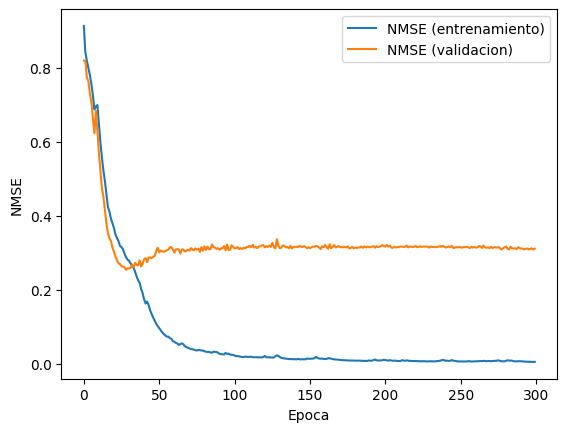

In [30]:
plt.plot(history.history['nmse'], label='NMSE (entrenamiento)')
plt.plot(history.history['val_nmse'], label='NMSE (validacion)')
plt.xlabel('Epoca')
plt.ylabel('NMSE')
plt.legend()
plt.show()

**GUARDAR UN MODELO ESPECÍFICO**

In [31]:
# Directorio en donde se almacenara el modelo
save_dir = 'D:/TT/Memoria/MemoriaCodigoFuentev3/codigo_matlab/codigo_fuente/signals_LDS/' + persona
os.makedirs(save_dir, exist_ok=True)  # Crear el directorio si no existe

# Nombre del archivo del modelo
model_name = 'unet_model_' + lado + 'v2_batch16_epochs250.keras'

# Ruta completa del archivo
model_path = os.path.join(save_dir, model_name)

# Guardar el modelo entrenado
model.save(model_path)

**CARGAR UN MODELO ESPECÍFICO**

modelo_cargado = tf.keras.models.load_model('D:/TT/Memoria/waveletycnn/codigo_python/modelos_generados/unet_model_7.keras',
                                           custom_objects={'nmse': nmse})

**CARGAR COEFICIENTES (MATRIZ COMPLEJA) DE LA SEÑALES PAM ORIGINALES T OBTENER CANTIDAD DE MATRICES COMPLEJAS ENCONTRADAS**

input_matrix_complex_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/inputs_coeficientes' # coeficientes de senal PAM original (sin ruido) en formato .mat
output_matrix_complex_pam_dir = 'D:/TT/Memoria/waveletycnn/codigo_python/inputs_coeficientes_npy' # coeficientes de senal PAM original (sin ruido) en formato .npy
os.makedirs(output_matrix_complex_pam_dir, exist_ok=True) # crear directorio "output_matrix_complex_pam_dir" si no existe

# Se leen la cantidad de coeficientes o matrices complejas de senales PAM encontradas en el directorio "input_matrix_complex_pam_dir"
total_matrix_complex_pam = sum(1 for filename in os.listdir(input_matrix_complex_pam_dir) if filename.endswith('.mat')) + 1
print("Total de matrices complejas PAM encontradas -> ", total_matrix_complex_pam - 1)

**TRANSFORMAR A FORMATO .npy LAS MATRICES COMPLEJAS ASOCIADAS A LA SEÑAL ORIGINAL PAM**

# Funcion para convertir una matriz compleja de .mat a .npy
def convert_mat_to_npy_original_signal(input_dir, output_dir, prefix):
    for i in range(1, total_matrix_complex_pam):
        mat_file = os.path.join(input_dir, f'{prefix}_{i}.mat')
        npy_file = os.path.join(output_dir, f'{prefix}_npy_{i}.npy')
        
        # Cargar el archivo .mat
        mat_data = loadmat(mat_file)
        
        # Extraer la matriz compleja
        matrix_key = [key for key in mat_data.keys() if not key.startswith('__')][0]
        matrix = mat_data[matrix_key]
        
        # Guardar la matriz en formato .npy
        np.save(npy_file, matrix)

# Convertir las matrices comlejas de senales PAM originales de formato .mat a .npy
convert_mat_to_npy_original_signal(input_matrix_complex_pam_dir, output_matrix_complex_pam_dir, 'matrix_complex_pam_to_predict')

**PREDECIR COEFICIENTES DE UNA SEÑAL DE VSC A PARTIR DE COEFICIENTES DE UNA SEÑAL PAM**

# Funcion para predecir con el modelo entrenado
def predecir_coefs(modelo_cargado, input_data):
    coefs_predicted = modelo_cargado.predict(input_data)
    return coefs_predicted


# Listar todos los archivos en el directorio
archivos_npy_dir = os.listdir(output_matrix_complex_pam_dir)
# Filtrar solo los archivos .npy
archivos_npy = [f for f in archivos_npy_dir if f.endswith('.npy')]

# Cargar una matriz de entrada para hacer una prediccion 
# Leer el primer archivo .npy
nombre_archivo_pam_npy = archivos_npy[0]
archivo_pam_npy_dir = os.path.join(output_matrix_complex_pam_dir, nombre_archivo_pam_npy) # ELEGIR ARCHIVOS NPY A LEER (0, 1, 2, 3, 4, ...)

#######################
# ENTRADA PARA LA RED:
######################
input_matrix_pam = np.load(archivo_pam_npy_dir)
print("Archivo cargado:", archivo_pam_npy_dir)
print("formato matrix complex input: ",input_matrix_pam.shape)

tensor_input_matrix_pam = np.stack((input_matrix_pam.real, input_matrix_pam.imag), axis=-1)
print("formato matrix complex input como tensor: ",tensor_input_matrix_pam.shape)

# Expandir dimensiones para que coincidan con la forma esperada por el modelo
tensor_input_matrix_pam = np.expand_dims(tensor_input_matrix_pam, axis=0)
print("Formato matrix complex input con dimensión adicional:", tensor_input_matrix_pam.shape)


**REALIZAR PREDICCIÓN (OBTENCIÓN DE COEFICIENTES DE SEÑAL VSC ESTIMADA)**

# Realizar la predicción
predicted_output = predecir_coefs(modelo_cargado, tensor_input_matrix_pam)

# Mostrar la predicción
print("Prediccion de la primera muestra de entrada:")
print(predicted_output)
print("Formato de los coeficientes de la senal VSC estimada: ", predicted_output.shape)

**TRANSFORMAR LA SALIDA ESTIMADA A UN FORMATO (36, 1024) Y LUEGO DE .npy a .mat**

# Transformar la matriz tensor VSC a una matriz compleja de formato .mat
# El tensor tiene la forma (1, 36, 1024, 2) y necesitamos transformarlo a (36, 1024) a matriz compleja
complex_matrix_vsc = predicted_output[0, :, :, 0] + 1j * predicted_output[0, :, :, 1]
print("Formato nuevo:",complex_matrix_vsc.shape)

# Especificar la ruta completa del archivo, incluyendo el nombre y la extensión .mat
ruta_archivo = "D:\TT\Memoria\waveletycnn\codigo_matlab\codigo_fuente\coefs_vsc_predicted\coefs_vsc_predicted.mat"

# Guardar la matriz compleja en el archivo especificado
scipy.io.savemat(ruta_archivo, {'complex_matrix_vsc': complex_matrix_vsc})


**TRANSFORMACIÓN DE COEFICIENTES DE LA SENAL VSC ESTIMADA DE FORMATO .mat a .npy**

**GUARDADO DE LA MATRIZ COMPLEJA DE LA VSC ESTIMADA EN UNA CARPETA EN EL DIRECTORIO DE MATLAB EN FORMATO .mat**

# Directorio donde se guardara la matriz compleja de la VSC estimada en formato .mat
mat_dir = 'D:/TT/Memoria/waveletycnn/codigo_matlab/codigo_fuente/coefs_vsc_predicted'
os.makedirs(mat_dir, exist_ok=True) # crear directorio "mat_dir" si no existe

# Extraer el número como cadena
numero_como_cadena = nombre_archivo_pam_npy.split('_')[-1].split('.')[0]

# Nombre que tendra el archivo de la matriz compleja d la VSC estimada .mat. Se concatena el numero del archivo estimado
mat_filename = f'matrix_complex_vsc_predicted_{numero_como_cadena}.mat'
print(mat_filename)

# Ruta completa del archivo .mat
mat_path = os.path.join(mat_dir, mat_filename)


try:
    data = scipy.io.loadmat(mat_path)
    print("El archivo es un archivo .mat válido.")
    print(data.keys())
except Exception as e:
    print(f"Error al cargar el archivo .mat: {e}")


# Guardar la matriz compleja en un archivo .mat {nombre archivo: contenido archivo}
scipy.io.savemat(mat_path, {mat_filename: complex_matrix_vsc})

print(f"Archivo guardado en: {mat_path}")